## Project 2 TAA Blog

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Processing the data

In [2]:
df = pd.read_csv('housepricedata.csv')
dataset = df.values

X = dataset[:,:-1]
Y = dataset[:,-1]


In [3]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [4]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


### Blog NN 

In [5]:
from keras.models import Sequential
from keras.layers import Dense

#### Define architecture

In [6]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 15ms/step - loss: 0.7005 - accuracy: 0.4912 - precision: 0.4762 - recall: 0.0193 - val_loss: 0.6887 - val_accuracy: 0.5434 - val_precision: 0.3684 - val_recall: 0.0737
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6858 - accuracy: 0.6027 - precision: 0.7132 - recall: 0.3642 - val_loss: 0.6828 - val_accuracy: 0.5936 - val_precision: 0.5349 - val_recall: 0.4842
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6429 - precision: 0.6667 - recall: 0.5934 - val_loss: 0.6780 - val_accuracy: 0.6347 - val_precision: 0.5664 - val_recall: 0.6737
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6667 - accuracy: 0.6791 - precision: 0.6462 - recall: 0.8131 - val_loss: 0.6722 - val_accuracy: 0.6393 - val_precision: 0.5597 - val_recall: 0.7895
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6584 - accuracy: 0.7025 - precis

Epoch 38/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3873 - accuracy: 0.8659 - precision: 0.8399 - recall: 0.9094 - val_loss: 0.3872 - val_accuracy: 0.8767 - val_precision: 0.8469 - val_recall: 0.8737
Epoch 39/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3814 - accuracy: 0.8659 - precision: 0.8399 - recall: 0.9094 - val_loss: 0.3806 - val_accuracy: 0.8767 - val_precision: 0.8617 - val_recall: 0.8526
Epoch 40/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8669 - precision: 0.8450 - recall: 0.9037 - val_loss: 0.3756 - val_accuracy: 0.8813 - val_precision: 0.8557 - val_recall: 0.8737
Epoch 41/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3702 - accuracy: 0.8650 - precision: 0.8420 - recall: 0.9037 - val_loss: 0.3708 - val_accuracy: 0.8767 - val_precision: 0.8400 - val_recall: 0.8842
Epoch 42/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3653 - accuracy: 0.8689 - pr

32/32 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8767 - precision: 0.8715 - recall: 0.8882 - val_loss: 0.2878 - val_accuracy: 0.9041 - val_precision: 0.8936 - val_recall: 0.8842
Epoch 75/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8767 - precision: 0.8701 - recall: 0.8902 - val_loss: 0.2864 - val_accuracy: 0.9041 - val_precision: 0.8936 - val_recall: 0.8842
Epoch 76/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8787 - precision: 0.8692 - recall: 0.8960 - val_loss: 0.2855 - val_accuracy: 0.9132 - val_precision: 0.9222 - val_recall: 0.8737
Epoch 77/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8796 - precision: 0.8779 - recall: 0.8863 - val_loss: 0.2850 - val_accuracy: 0.9087 - val_precision: 0.8947 - val_recall: 0.8947
Epoch 78/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2828 - accuracy: 0.8787 - precision: 0.87

In [7]:
evaluate_results = model.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.3024 - accuracy: 0.8858 - precision: 0.8678 - recall: 0.9211


### Loss visualization

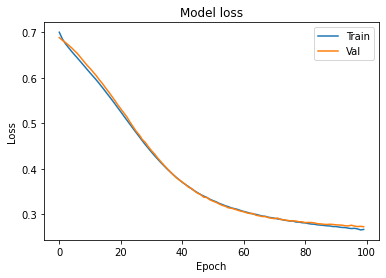

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Accuracy visualization

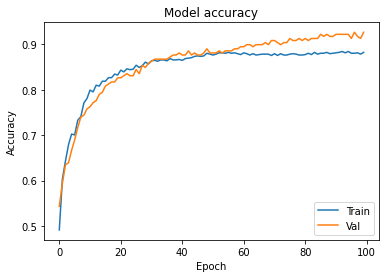

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

## Hyperparameter Tuning

In [19]:
def get_mlp_model(hiddenLayerOne=32, hiddenLayerTwo=32):

    model = Sequential()
    model.add(Dense(hiddenLayerOne, activation="relu", input_shape=(10,)))
    model.add(Dense(hiddenLayerTwo, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    
    # compile the model
    model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])
    # return compiled model
    return model

In [20]:
from scikeras.wrappers import KerasClassifier

model_2 = KerasClassifier(get_mlp_model, hiddenLayerOne = 32, hiddenLayerTwo = 32, verbose=0)

hiddenLayerOne = [2, 4, 8,16,32,64,128]
hiddenLayerTwo = [2, 4, 8,16,32,64,128]
batchSize = [4, 8, 16, 32, 64]
epochs = [10, 20, 30, 40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]

grid = dict(
    hiddenLayerOne=hiddenLayerOne,
    hiddenLayerTwo=hiddenLayerTwo,
    batch_size=batchSize,
    epochs=epochs
)

In [21]:
from sklearn.model_selection import GridSearchCV

searcher = GridSearchCV(
    estimator=model_2,
    param_grid=grid,
    scoring="accuracy",
    cv=3,
    n_jobs=-1,
)


searchResults = searcher.fit(X_train, Y_train)
# summarize grid search information
bestScore = searchResults.best_score_
bestParams = searchResults.best_params_
print("[INFO] best score is {:.2f} using {}".format(bestScore, bestParams))

[INFO] best score is 0.90 using {'batch_size': 4, 'epochs': 160, 'hiddenLayerOne': 16, 'hiddenLayerTwo': 64}


## Model After Hyperparameter Tuning

In [23]:
model_2 = Sequential([
    Dense(16, activation='relu', input_shape=(10,)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall'])


hist_2 = model_2.fit(X_train, Y_train,
          batch_size=4, epochs=160,
          validation_data=(X_val, Y_val))

Epoch 1/160
256/256 [==============================] - 1s 3ms/step - loss: 0.6730 - accuracy: 0.5802 - precision: 0.5536 - recall: 0.8960 - val_loss: 0.6636 - val_accuracy: 0.4521 - val_precision: 0.4413 - val_recall: 0.9895
Epoch 2/160
256/256 [==============================] - 0s 2ms/step - loss: 0.6347 - accuracy: 0.6634 - precision: 0.6038 - recall: 0.9807 - val_loss: 0.6220 - val_accuracy: 0.7215 - val_precision: 0.6104 - val_recall: 0.9895
Epoch 3/160
256/256 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.7828 - precision: 0.7200 - recall: 0.9364 - val_loss: 0.5676 - val_accuracy: 0.8174 - val_precision: 0.7200 - val_recall: 0.9474
Epoch 4/160
256/256 [==============================] - 0s 2ms/step - loss: 0.5337 - accuracy: 0.8209 - precision: 0.7667 - recall: 0.9306 - val_loss: 0.5109 - val_accuracy: 0.8082 - val_precision: 0.7120 - val_recall: 0.9368
Epoch 5/160
256/256 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.8376

256/256 [==============================] - 0s 2ms/step - loss: 0.2532 - accuracy: 0.8943 - precision: 0.8944 - recall: 0.8979 - val_loss: 0.2835 - val_accuracy: 0.9132 - val_precision: 0.8878 - val_recall: 0.9158
Epoch 38/160
256/256 [==============================] - 0s 2ms/step - loss: 0.2541 - accuracy: 0.8845 - precision: 0.8790 - recall: 0.8960 - val_loss: 0.2797 - val_accuracy: 0.9178 - val_precision: 0.9140 - val_recall: 0.8947
Epoch 39/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2496 - accuracy: 0.8885 - precision: 0.8917 - recall: 0.8882 - val_loss: 0.2948 - val_accuracy: 0.9087 - val_precision: 0.9310 - val_recall: 0.8526
Epoch 40/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2497 - accuracy: 0.8894 - precision: 0.8874 - recall: 0.8960 - val_loss: 0.2839 - val_accuracy: 0.9178 - val_precision: 0.8969 - val_recall: 0.9158
Epoch 41/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2436 - accuracy: 0.8914 - preci

256/256 [==============================] - 0s 1ms/step - loss: 0.2401 - accuracy: 0.8914 - precision: 0.8835 - recall: 0.9056 - val_loss: 0.3136 - val_accuracy: 0.8995 - val_precision: 0.9294 - val_recall: 0.8316
Epoch 74/160
256/256 [==============================] - 0s 2ms/step - loss: 0.2391 - accuracy: 0.8875 - precision: 0.8797 - recall: 0.9017 - val_loss: 0.2963 - val_accuracy: 0.9178 - val_precision: 0.9231 - val_recall: 0.8842
Epoch 75/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.8933 - precision: 0.8912 - recall: 0.8998 - val_loss: 0.2928 - val_accuracy: 0.9178 - val_precision: 0.9140 - val_recall: 0.8947
Epoch 76/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2392 - accuracy: 0.8933 - precision: 0.8897 - recall: 0.9017 - val_loss: 0.2940 - val_accuracy: 0.9178 - val_precision: 0.9053 - val_recall: 0.9053
Epoch 77/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2368 - accuracy: 0.8982 - preci

256/256 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.8973 - precision: 0.8906 - recall: 0.9094 - val_loss: 0.3399 - val_accuracy: 0.8858 - val_precision: 0.8241 - val_recall: 0.9368
Epoch 110/160
256/256 [==============================] - 0s 2ms/step - loss: 0.2387 - accuracy: 0.8924 - precision: 0.8880 - recall: 0.9017 - val_loss: 0.2983 - val_accuracy: 0.9132 - val_precision: 0.8878 - val_recall: 0.9158
Epoch 111/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2357 - accuracy: 0.8885 - precision: 0.8799 - recall: 0.9037 - val_loss: 0.2976 - val_accuracy: 0.9178 - val_precision: 0.9231 - val_recall: 0.8842
Epoch 112/160
256/256 [==============================] - 0s 2ms/step - loss: 0.2355 - accuracy: 0.8963 - precision: 0.8948 - recall: 0.9017 - val_loss: 0.2961 - val_accuracy: 0.9132 - val_precision: 0.8958 - val_recall: 0.9053
Epoch 113/160
256/256 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.8973 - p

256/256 [==============================] - 0s 1ms/step - loss: 0.2297 - accuracy: 0.8953 - precision: 0.8872 - recall: 0.9094 - val_loss: 0.3030 - val_accuracy: 0.9178 - val_precision: 0.8889 - val_recall: 0.9263
Epoch 146/160
256/256 [==============================] - 0s 2ms/step - loss: 0.2311 - accuracy: 0.8933 - precision: 0.8883 - recall: 0.9037 - val_loss: 0.2988 - val_accuracy: 0.9178 - val_precision: 0.9053 - val_recall: 0.9053
Epoch 147/160
256/256 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.9022 - precision: 0.8945 - recall: 0.9152 - val_loss: 0.3169 - val_accuracy: 0.8995 - val_precision: 0.8476 - val_recall: 0.9368
Epoch 148/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2301 - accuracy: 0.8943 - precision: 0.8841 - recall: 0.9114 - val_loss: 0.3486 - val_accuracy: 0.8950 - val_precision: 0.9500 - val_recall: 0.8000
Epoch 149/160
256/256 [==============================] - 0s 1ms/step - loss: 0.2337 - accuracy: 0.8953 - p

In [24]:
evaluate_results_2 = model_2.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.2536 - accuracy: 0.9087 - precision: 0.8983 - recall: 0.9298


### Loss visualization of Best Model

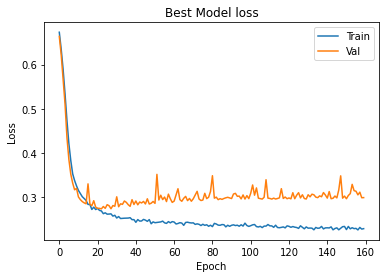

In [27]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Best Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Accuracy visualization of Best Model

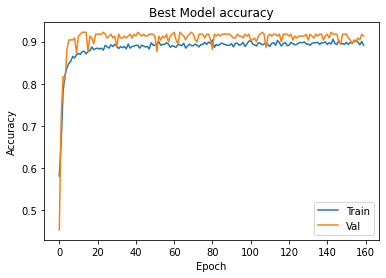

In [26]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Best Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()